In [123]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
sns.set_theme(palette="RdPu")

In [919]:
orders = pd.read_csv('orders.csv')
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
order_items = pd.read_csv('order_itemss.csv')


In [832]:
orders.head()

,order_id,customer_id,order_date,status
0,1,32,2024-05-05,cancelled
1,2,47,2024-02-12,completed
2,3,86,2024-04-24,cancelled
3,4,23,2024-04-20,completed
4,5,66,2024-05-30,completed


In [834]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     500 non-null    int64 
 1   customer_id  500 non-null    int64 
 2   order_date   500 non-null    object
 3   status       497 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [836]:
customers.head()

,customer_id,name,age,city,registration_date
0,1,Customer_1,56.0,Yekaterinburg,2023-01-02
1,2,Customer_2,69.0,Moscow,2023-05-10
2,3,Customer_3,46.0,Moscow,2023-08-08
3,4,Customer_4,32.0,Moscow,2023-02-23
4,5,Customer_5,60.0,Moscow,2023-12-09


In [838]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        100 non-null    int64  
 1   name               100 non-null    object 
 2   age                97 non-null     float64
 3   city               100 non-null    object 
 4   registration_date  100 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ KB


In [840]:
products.head()

,product_id,product_name,category,price
0,1,Product_A,Home,4973.30
1,2,Product_B,Books,2402.73
2,3,Product_C,Books,1469.85
3,4,Product_D,Sports,4429.12
4,5,Product_E,Books,3763.82


In [842]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    20 non-null     int64  
 1   product_name  20 non-null     object 
 2   category      20 non-null     object 
 3   price         20 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 772.0+ bytes


In [844]:
order_items.head()

,order_item_id,order_id,product_id,quantity
0,1,1,7,3
1,2,2,5,2
2,3,3,1,1
3,4,4,13,1
4,5,4,18,2


In [846]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   order_item_id  988 non-null    int64
 1   order_id       988 non-null    int64
 2   product_id     988 non-null    int64
 3   quantity       988 non-null    int64
dtypes: int64(4)
memory usage: 31.0 KB


In [848]:
orders[orders['status'].isna()]

,order_id,customer_id,order_date,status
50,51,86,2024-03-01,NaN
51,52,49,2024-03-21,NaN
52,53,52,2024-01-26,NaN


In [933]:
#потом удалить
orders.dropna(inplace=True)

In [935]:
orders=orders.reset_index(drop=True)
print(f" количество строк с пропущенным значением - {len(orders[orders['status'].isna()])}")

 количество строк с пропущенным значением - 0


In [937]:
customers.dropna(inplace=True)

In [939]:
customers=customers.reset_index(drop=True)

In [941]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        97 non-null     int64         
 1   name               97 non-null     object        
 2   age                97 non-null     float64       
 3   city               97 non-null     object        
 4   registration_date  97 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.9+ KB


In [943]:
orders['order_date']=pd.to_datetime(orders['order_date'], format = '%Y-%m-%d')

In [945]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     497 non-null    int64         
 1   customer_id  497 non-null    int64         
 2   order_date   497 non-null    datetime64[ns]
 3   status       497 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 15.7+ KB


In [947]:
customers['registration_date']=pd.to_datetime(customers['registration_date'], format='%Y-%m-%d')

<b> ВЫВОДЫ <b>

1. Было удалено 3 строки с Nan значениями из таблицы orders и customers, так как они содержали информацию, которую не восстановить.
2. Дубликатов и скрытых дубликатов не обнаружено
3. Столбцы order_date в orders и registration_date в customers были переведены в формат datetime

In [949]:
#Сколько всего клиентов в базе?
len(customers['customer_id'])

97

In [1185]:
#Какой средний возраст клиентов?
round(customers['age'].mean())

44

In [1187]:
#В каком городе больше всего клиентов?
customers['city'].value_counts().sort_values().tail(1)

city
Moscow    28
Name: count, dtype: int64

<b> Клиенты:<b>

1. Количество клиентов - 97
2. Средний возраст клиентов - 44 года
3. В городе Москва проживает 28 клиентов, что являетя самым многочисленным городом по числу клиентов

In [872]:
#Сколько клиентов в каждой возрастной группе:
#18-25, 26-35, 36-45, 46-55, 56+? Визуализируйте с помощью seaborn
def sep(col):
    if 18<col<26:
        return '18-25'
    if 26<=col<36:
        return '26-35'
    if 36<=col<=46:
        return '36-45'
    if 46<=col<56:
        return '46-55'
    if col>=56:
        return '56+'

In [874]:
customers['rating_col']=customers['age'].apply(sep)

In [876]:
cc=customers['rating_col'].value_counts().reset_index()

Text(0, 0.5, 'количество клиентов')

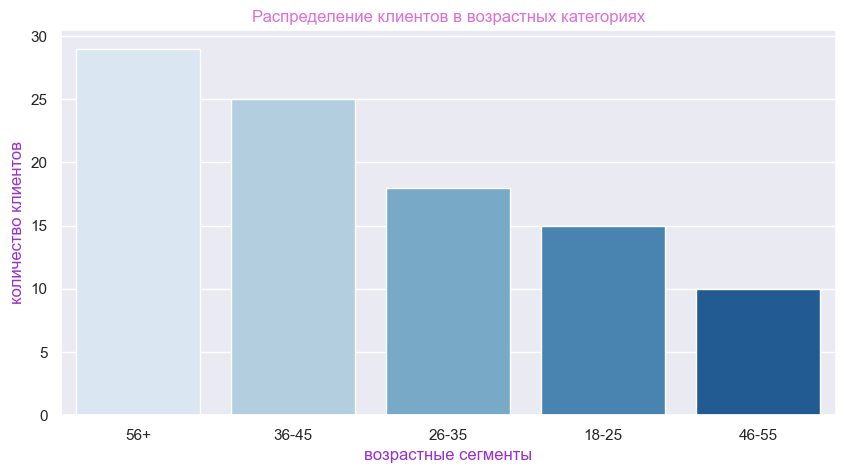

In [878]:
plt.figure(figsize=(10,5))
sns.barplot(data=cc, x='rating_col', y ='count',palette='Blues')
plt.title("Распределение клиентов в возрастных категориях", color='orchid')
plt.xlabel('возрастные сегменты',color='darkorchid')
plt.ylabel('количество клиентов', color='darkorchid')

<b> Из графика видно: <b>

Самый многочисленный сегмент - люди в возрасте 56+ лет, 
на втором месте расположены пользователи 36-45 лет.
Самым немногочисленным сегментом являяются люди 46-55 лет, что неождианно при рекордных показателях соседнего возрастного сегмента

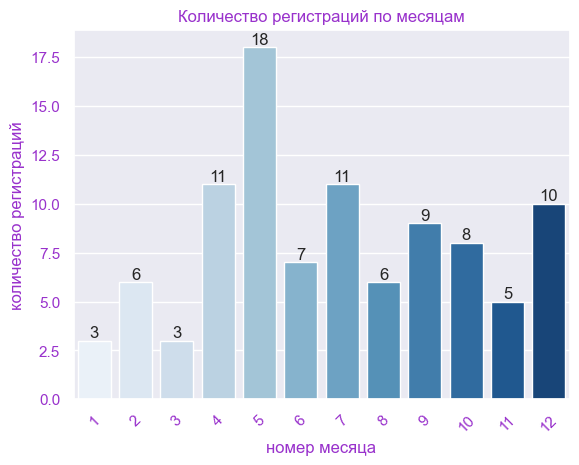

In [880]:
#Сколько клиентов зарегистрировалось в каждом месяце? 
#plt.figure(figsize=(3,8))
fig,ax=plt.subplots()
registrations=customers['registration_date'].dt.month.value_counts().reset_index().sort_values(by='registration_date') #.reindex(axis='registration_date')
registrations #.reindex(np.arange(1,13))
sns.barplot(data=registrations, x='registration_date', y='count', palette='Blues', ax=ax)
plt.title('Количество регистраций по месяцам',color='darkorchid')
plt.xlabel('номер месяца',color='darkorchid')
plt.ylabel('количество регистраций',color='darkorchid')
plt.xticks(rotation=45,color='darkorchid')
plt.yticks(color='darkorchid')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

Наблюдается вспышка активности по регистрациям в мае, что может быть причиной активной рекламы или подготовки к летнему сезону,
а также сезонный, простой в январе и феврале

In [882]:
#Рекордный месяц
registrations[registrations['count']==max(registrations['count'])]

,registration_date,count
0,5,18


In [884]:
print(f"В мае было совершено 18 регистраций - рекордный показатель")

В мае было совершено 18 регистраций - рекордный показатель


<b> ВЫВОДЫ <b>
1. Целевая аудитория фирмы - это пользователи старше 55 лет,
а также возрастной сегмент в диапазоне 35-45 лет. Это значит, что компании стоит сфокусировать свои маркетинговые компании
именно на этом сегменте, если в их интересах сфокусироваться на конкретной возрастной группе.
Напротив, если фирма заинтересована в поднятии охватов у молодежи и людей возраста 45-55 лет,
ей стоит настроить рекламу именно под эти сегменты
2. Наблюдается активная волна регистраций в апреле,мае, июле - с приходом лета люди получают больше позитивных
эмоций и хотят покупать больше товаров. Также, регстрации увеличены в канун нового года. Январь и февраль - традиционно месяцы простоя
Также, первые регистрации начались еще в 2023 году, тогда как заказы начали выполняться с 1 января 2024 года

In [887]:
#Сколько всего заказов?
len(orders)

497

<Figure size 1200x800 with 0 Axes>

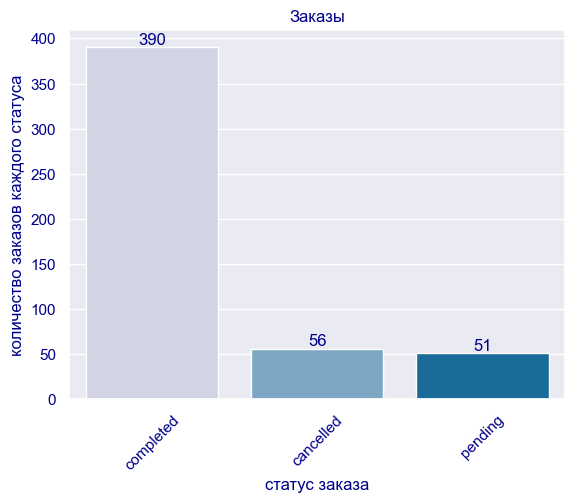

In [889]:
#Сколько заказов каждого статуса? Визуализируйте с помощью seaborn
orders_status=orders['status'].value_counts().reset_index()
#orders_status
plt.figure(figsize=(12,8))
fig,ax=plt.subplots()
sns.barplot(data=orders_status, x='status', y ='count',palette='PuBu')
plt.title('Заказы',color='darkblue')
plt.xlabel('статус заказа',color='darkblue')
plt.ylabel('количество заказов каждого статуса',color='darkblue')
plt.xticks(rotation=45,color='darkblue')
plt.yticks(color='darkblue')
for container in ax.containers:
    ax.bar_label(container,color='darkblue')
plt.show()

In [1251]:
#Динамика заказов по месяцам?
orders['month']=orders['order_date'].dt.month


In [893]:
#Динамика статусов заказов по месяцам
orders.pivot_table(index=['month','status'],
                   aggfunc='count',
                   values='customer_id')

customer_id
month status                
1     cancelled            7
      completed           72
      pending              4
2     cancelled            8
      completed           67
      pending              7
3     cancelled            9
      completed           65
      pending             10
4     cancelled           11
      completed           65
      pending             11
5     cancelled           13
      completed           65
      pending              9
6     cancelled            8
      completed           56
      pending             10

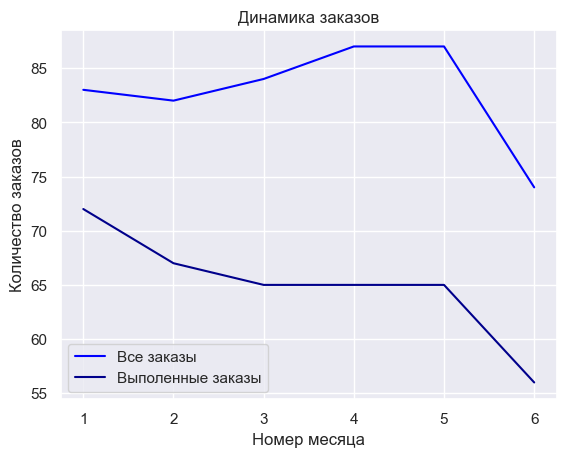

In [1201]:
orders_months=orders['month'].value_counts().reset_index().sort_values(by='month')
orders_months_app=orders[orders['status']=='completed']['month'].value_counts().reset_index().sort_values(by='month')
plt.plot(orders_months['month'],orders_months['count'], color='blue', label='Все заказы')
plt.plot(orders_months['month'],orders_months_app['count'], color='darkblue', label= 'Выполенные заказы')
plt.legend()
plt.xlabel('Номер месяца')
plt.ylabel('Количество заказов')
plt.title('Динамика заказов')
plt.show()

In [897]:
print(f"{round((len(orders[orders['status']=='cancelled'])/len(orders))*100,2)}% заказов отменено")

11.27% заказов отменено


<b> ВЫВОДЫ <b>

1. Было совершено 497 заказа
2. Среди которых  : 390 выполнено, 56 отменено, 51 в процессе
3. Наблюдается последовательное снижение выполненных заказов в течение года, что может сигнализировать о недостатке рекламы для сервиса
4. В период апрель-май номинальное число заказов увеличивается, но наблюдается разрыв с выполненными заказами.
5. 11.27% заказов отменено
   

In [899]:
customers[['age','city']].groupby('city').mean().round(1).sort_values(by='age').head(1)

,age
city,
Moscow,40.2


In [901]:
#Сколько клиентов в каждом городе старше 50 лет?
customers[customers['age']>50]['city'].value_counts().reset_index()

,city,count
0,Moscow,8
1,Yekaterinburg,7
2,Kazan,7
3,SPb,7
4,Novosibirsk,7


In [963]:
#В каком городе клиенты делают в среднем больше всего заказов? *
orders_cnt=orders.merge(customers, on='customer_id', how='left' )[['city','order_id','status']]
#Выполненных заказов
orders_cnt[orders_cnt['status']=='completed'][['city','order_id']].groupby(
    by='city').count().sort_values(
    by='order_id', ascending= False).head(1)

,order_id
city,
Moscow,109


In [965]:
#Сколько в среднем заказов на одного клиента в каждом городе? *
orders_per_user=orders.join(customers, on='customer_id', how='left' , lsuffix='_orders',rsuffix= '_customers')[['city','order_id']]
orders_per_user.pivot_table(index='city',
                            aggfunc=lambda x: round(x.mean()/len(x),2),
                            values= 'order_id').reset_index()

,city,order_id
0,Kazan,2.68
1,Moscow,1.97
2,Novosibirsk,2.59
3,SPb,3.60
4,Yekaterinburg,2.79


<b> ВЫВОДЫ <b>
1. Самые молодые клиенты сервиса проживают в Москве. Их средний возраст - 40 лет
2. Клиенты старше 50 лет распределены равномерно по городам, с небольшим отрывом у Москвы - 8 человек, против 7  - у остальных городов
3. Больше всего заказов приходится на Москву - 109 штук. Значит, жители столицы - потенциально самая выгодная аудитория по количеству пользователей и заказов
4. Лидером по среднему числу заказов на клиента - В Санкт-Петербурге : 3.6 заказа. Самая платежеспособная аудитория

In [1258]:
#Какой самый дорогой товар в каждой категории?
products[['category','price']].groupby(by='category').max().reset_index().sort_values(by='price',ascending=False)

,category,price
3,Home,4973.30
2,Electronics,4903.62
0,Books,4770.05
4,Sports,4429.12
1,Clothing,2808.55


<b> Самый дорогой товар расположне в категеории товаров для дома для дома, а уж потом - цифровизация. <b>

Тройку лидеров по ценам замыкают лучшие подарки - книги 

In [810]:
#Сколько товаров в каждой категории дороже 2000 рублей?
products[products['price']> 2000][['category','price']].groupby(by='category').count().reset_index()

,category,price
0,Books,4
1,Clothing,1
2,Electronics,2
3,Home,2
4,Sports,3


In [532]:
#Разделите товары на три ценовых сегмента: бюджетные (<1000), средние (1000-3000), премиум (>3000)
def product_sep(col):
    if col< 1000:
        return 'бюджетные'
    if 1000<=col<=3000:
        return 'комфорт'
    if col > 3000:
        return 'премиум'

In [1262]:
products['segments']= products['price'].apply(product_sep)

In [1264]:
products[['segments','price']].groupby('segments').agg({'price':['mean','count']}).reset_index().round(2)

segments    price      
                 mean count
0  бюджетные   457.12     2
1    комфорт  1981.18    11
2    премиум  4533.38     7

In [816]:
#В какой категории самый большой разброс цен?  
products[['category','price']].groupby(by='category').agg({lambda x: max(x) - min(x)}).reset_index().max()

category              Sports
price     <lambda>    4504.1
dtype: object

<b>Выводы:<b>

1. Самые дорогие товары имеют ценник почти в 5000 рублей. Самый дорогой товар расположен в сегменте товаров для дома
2. Самое большое количество дорогих товаров находится в сегменте книг : 4 книги стоят дороже 2 000 рублей
3. В ассортименте сервиса можно найти товары в разных ценовых категориях, приемлемых для разных групп пользователей:

       1. Бюджетные товары со средним ценой в  457 рублей - скромный подарок
       2. Товары класса "комфорт" со средней ценой в 1981 рубль  - полноценная покупка
       3. Премиальные товары со средней ценой в 4533 рубля - роскошь в каждом рубле
   
4. Самый большой разброс цен наблюдается в категории спортивной одежды. Самый дорогой и самый дешевый товар отличаются на 4500 рублей. Такой результат может объясняться разнообразием продуктов в этой категории

In [1073]:
#Какой процент заказов выполнен для каждого города?
orders_completed=orders.merge(customers, on='customer_id', how='inner' )[['city','status']]
orders_completed.groupby('city').agg(lambda x: format((x[x=='completed'].count()/len(x)), ".0%")).reset_index()

,city,status
0,Kazan,76%
1,Moscow,80%
2,Novosibirsk,84%
3,SPb,69%
4,Yekaterinburg,78%


In [ ]:
#В каком городе самый высокий процент отмененных заказов?


In [1275]:
orders_cancelled=orders.merge(customers, on='customer_id', how='inner' )[['city','status']]
orders_completed.groupby('city').agg(lambda x: x[x=='cancelled'].count()*100/len(x)).reset_index().sort_values(by='status', ascending=False).head(1).round(2)

,city,status
4,Yekaterinburg,15.66


In [1081]:
#Какой средний интервал между регистрацией клиента и его первым заказом?
interval=orders.merge(customers, on='customer_id', how='inner' )
orders['delta']=interval['order_date'] - interval['registration_date']

In [1083]:
orders['delta'].mean()

Timedelta('267 days 19:11:23.924843424')

In [1085]:
#Есть ли клиенты, которые сделали заказ в день регистрации?
print(f"""{len(orders.query('delta=="0 days"'))} клиентов, которые сделали заказ в день регистрации""")


0 клиентов, которые сделали заказ в день регистрации


In [1087]:
#Сколько клиентов сделали только один заказ, а сколько более 5?
c_ord=interval['customer_id'].value_counts().reset_index()
print(f"""{len(c_ord.query('count>5'))} клиентов сделали более 5 заказов,\n{len(c_ord.query('count==5'))} клиентов - только 1 заказ""")

35 клиентов сделали более 5 заказов,
17 клиентов - только 1 заказ


In [1093]:
#Какой процент клиентов совершили повторные заказы?
format(len(c_ord.query('count>1'))/len(c_ord),".0%")


'99%'

In [1163]:
avg_price=order_items.merge(orders, on='order_id', how='inner').merge(products, on='product_id', how='left')[['order_id','price','status']]
print(f"""Средний чек выполненных заказов - {round(avg_price.query('status=="completed"')[['order_id','price']].groupby(by='order_id').sum().mean(),2)}""")

Средний чек выполненных заказов - price    5447.01
dtype: float64


In [1177]:
#В каких заказах больше 2 товаров?
ord_products=order_items.merge(orders, on='order_id', how='inner')[['order_id','product_id']].groupby(by='order_id').count().reset_index()
res_prod=format(len(ord_products.query('product_id>2'))/len(ord_products),".0%")

In [1179]:
print(f""" в {res_prod} заказов содержится более 2 товаров""")

 в 31% заказов содержится более 2 товаров


<b>ВЫВОДЫ: <b>

Заказы:
1. Фирма активно старается выполнять заказы во всех представленных городах. Мы видим, что в среднем 80% заказов выполняются.
Лучшие показатели демонстрирует Новосибирск с 84% выполненных заказов, а Санкт-Петербург - антилидер с 69% выполнения
2. В Екатеринбурге самый большой процент отменнных заказов - практически 16%. Стоит сконцентрироваться на этом городе и выяснить причины отменных заказов, чтобы не проиграть в конкуренции с другими орагнизациями
3. Средний интервал между регистрацией пользователя и первым заказом составляет 267 дней, так как регистрация была доступна с 2023 года, а первые доставки начались только с 1 января 2024 года
4. Нет клиентов, которые совершили заказ в день покупки. Возможно, это объясняется относительно небольшим количеством пользователей сервиса. Все впереди!
5. 35 клиентов совершили более 5 покупок с сервисом, а 99% клиентов возвращаются к сервису и совершают повторный заказ - большая лояльность клиентов

Корзина покупок:

1. Средний чек выполненных заказов - 5447 рублей
2. В 31% заказов содержится более более двух товаров   


<b>Таким образом: <b>
1. Была произведена загрузка и предобработка датасатеов
2. Проанализирована динамика регистраций на сервис, числа заказов;
 визуализация результатов представлена в графиках и столбчатых диаграммах

3. Были выявлены основные возрастные группы пользователей,
среди них - самые многочисленные и малочисленные сегменты.
Исходя из результатов, фирма сможет сфокусировать свое позиционирование
на самых обширных категориях (35-46, 56+) лет,
или напротив, запустить рекламу для привлечения менеее активных групп пользователей
4. Среди продуктов обнаружены самый дорогой товар по категориям. Лидер: книги
5. Выявлены основные паттерны поведения клиентов : средний чек, количество продуктов в заказе,
процент повторных заказов - лояльных клиентов
6. Найдены города - лидеры по пользователям, выполненным и отмененным доставкам. Для фирмы, это сигнал - на каких городах стоит сфокусироваться, чтобы не потреять рынок.